1) Qual a ideia principal das máquinas de vetores de suporte?

R: A ideia principal é criar uma separação entre os dados a partir de uma função e desenhar margens em sua volta tentando manter as margens o mais ditante o possível da origem.

2. O que é um vetor de suporte?

R: São as amostras mais distantes das suas amostras de classe que fornecem o tamanho máximo da margem da SVM.

3. Por qual motivo é importante escalonar os dados de uma SVM?

R: As svms são muito sensíveis as escalas de dados pois trabalham com a ideia de hipperplano de features, escalonar os dados define a mesma escala para todas as features facilitando o problema.

4. Um modelo de SVM pode gerar uma saída de um score de confiança? E de probabilidade?

R: De confiança sim. No entanto não pode gerar saída de probabilidade

5. Para um conjunto de dados que possui milhões de instâncias e centenas de características é aconselhável usar o problema primal ou de dualidade?

R: Utilizar a resolução primal, pois o problema da dualidade é mais rápido instâsncias menores que o numero de características

6- Você treinou um classificador SVM que subajustou os dados. O que fazer com os parâmetros gamma e C?

R: C- Aumentar o valor para que o modelo sofra menos regularização


gamma- Semelhante ao C deve ser aumentado para que o modelo sofra menos regularização

7-Como definir os parâmetros H, f , b e a para um QP Solver?

H - Matriz identidade de n_p (matriz de características) exceto com zeor na célula superior esquerda

f - vetor unidimensional de zeros

b - vetor unidimensioanl de -1

a - -t da iesima características - x da iesima caracterpisticas

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)



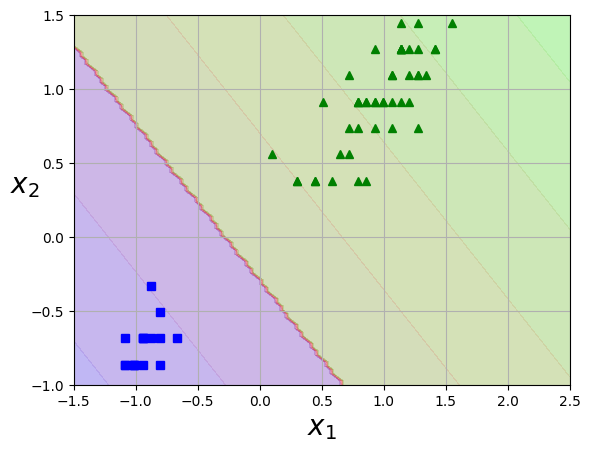

In [3]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)


lin_svc = LinearSVC(C=1, loss='hinge')
lin_svc.fit(X,y)
lin_svc.predict([[5.5,1.7]])
plot_predictions(lin_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


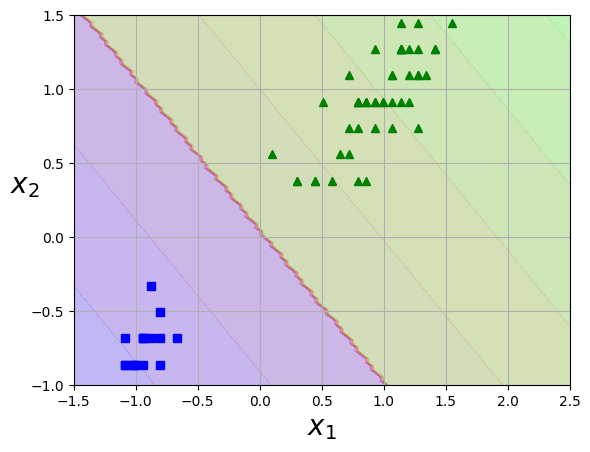

In [4]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X,y)
sgd_clf.predict([[5.5,1.7]])
plot_predictions(sgd_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

9- Treinar um classificador SVM para o conjunto de dados MNIST

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


svc_clf = Pipeline([('std_scaler',StandardScaler()),('clf',SVC(kernel='rbf',verbose=2))])
svc_clf.fit(X_train,y_train)


[LibSVM]*
optimization finished, #iter = 651
obj = -98.539456, rho = -0.177579
nSV = 341, nBSV = 73
.*.*
optimization finished, #iter = 2015
obj = -304.337277, rho = 0.744252
nSV = 1111, nBSV = 261
.*
optimization finished, #iter = 1755
obj = -249.078383, rho = 0.590162
nSV = 909, nBSV = 203
*.*
optimization finished, #iter = 1309
obj = -178.811639, rho = 0.363231
nSV = 683, nBSV = 132
.*
optimization finished, #iter = 1834
obj = -320.934667, rho = 0.484187
nSV = 973, nBSV = 292
.*.*
optimization finished, #iter = 2003
obj = -325.169984, rho = 0.698214
nSV = 1069, nBSV = 291
.*
optimization finished, #iter = 1527
obj = -182.845133, rho = 0.725665
nSV = 868, nBSV = 133
.*
optimization finished, #iter = 1598
obj = -283.925955, rho = 0.262827
nSV = 834, nBSV = 242
*.*
optimization finished, #iter = 1244
obj = -229.366397, rho = 0.439921
nSV = 696, nBSV = 206
.*
optimization finished, #iter = 1394
obj = -286.598853, rho = 0.833230
nSV = 885, nBSV = 302
*.*
optimization finished, #iter = 13

Pipeline(steps=[('std_scaler', StandardScaler()), ('clf', SVC(verbose=2))])

In [7]:
from sklearn.metrics import accuracy_score

y_hat = svc_clf.predict(X_test)
accuracy_score(y_test,y_hat)


0.966

10- Treine um SVC no dataset california

In [8]:

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [9]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import LinearSVR
svc_clf = Pipeline([('std_scaler',StandardScaler()),('clf',LinearSVR())])
svc_clf.fit(X_train,y_train)